# Visualising GO pathways for ECOLI cohort

## Read data

In [4]:
orDataString = """binding (GO:0005488)	8	Molecular Function
ATP-dependent activity (GO:0140657)	3	Molecular Function
catalytic activity (GO:0003824)	27	Molecular Function
transporter activity (GO:0005215)	6	Molecular Function
response to stimulus (GO:0050896)	5	Biological Process
cellular process (GO:0009987)	34	Biological Process
metabolic process (GO:0008152)	30	Biological Process
homeostatic process (GO:0042592)	1	Biological Process
biological regulation (GO:0065007)	1	Biological Process
localization (GO:0051179)	6	Biological Process
cellular anatomical entity (GO:0110165)	27	Cellular Component
protein-containing complex (GO:0032991)	3	Cellular Component
Proline biosynthesis (P02768)	1	Pathway
Peptidoglycan biosynthesis (P02763)	1	Pathway
Pentose phosphate pathway (P02762)	1	Pathway
N-acetylglucosamine metabolism (P02756)	1	Pathway
Tyrosine biosynthesis (P02784)	1	Pathway
Sulfate assimilation (P02778)	1	Pathway
ATP synthesis (P02721)	1	Pathway
Histidine biosynthesis (P02747)	1	Pathway"""
orData = list(map(lambda x: x.split('\t'), orDataString.split('\n')))
# .apply()
orData

[['binding (GO:0005488)', '8', 'Molecular Function'],
 ['ATP-dependent activity (GO:0140657)', '3', 'Molecular Function'],
 ['catalytic activity (GO:0003824)', '27', 'Molecular Function'],
 ['transporter activity (GO:0005215)', '6', 'Molecular Function'],
 ['response to stimulus (GO:0050896)', '5', 'Biological Process'],
 ['cellular process (GO:0009987)', '34', 'Biological Process'],
 ['metabolic process (GO:0008152)', '30', 'Biological Process'],
 ['homeostatic process (GO:0042592)', '1', 'Biological Process'],
 ['biological regulation (GO:0065007)', '1', 'Biological Process'],
 ['localization (GO:0051179)', '6', 'Biological Process'],
 ['cellular anatomical entity (GO:0110165)', '27', 'Cellular Component'],
 ['protein-containing complex (GO:0032991)', '3', 'Cellular Component'],
 ['Proline biosynthesis (P02768)', '1', 'Pathway'],
 ['Peptidoglycan biosynthesis (P02763)', '1', 'Pathway'],
 ['Pentose phosphate pathway (P02762)', '1', 'Pathway'],
 ['N-acetylglucosamine metabolism (P02756

In [5]:
import pandas as pd


orDf = pd.DataFrame(orData, columns=['GO term', 'Count', 'Ontology'])
orDf

,GO term,Count,Ontology
0,binding (GO:0005488),8,Molecular Function
1,ATP-dependent activity (GO:0140657),3,Molecular Function
2,catalytic activity (GO:0003824),27,Molecular Function
3,transporter activity (GO:0005215),6,Molecular Function
4,response to stimulus (GO:0050896),5,Biological Process
5,cellular process (GO:0009987),34,Biological Process
6,metabolic process (GO:0008152),30,Biological Process
7,homeostatic process (GO:0042592),1,Biological Process
8,biological regulation (GO:0065007),1,Biological Process
9,localization (GO:0051179),6,Biological Process


In [6]:
molecularDf = orDf[orDf.Ontology == 'Molecular Function']
biologicalDf = orDf[orDf.Ontology == 'Biological Process']
cellularDf = orDf[orDf.Ontology == 'Cellular Component']
pathwayDf = orDf[orDf.Ontology == 'Pathway']

## Plot

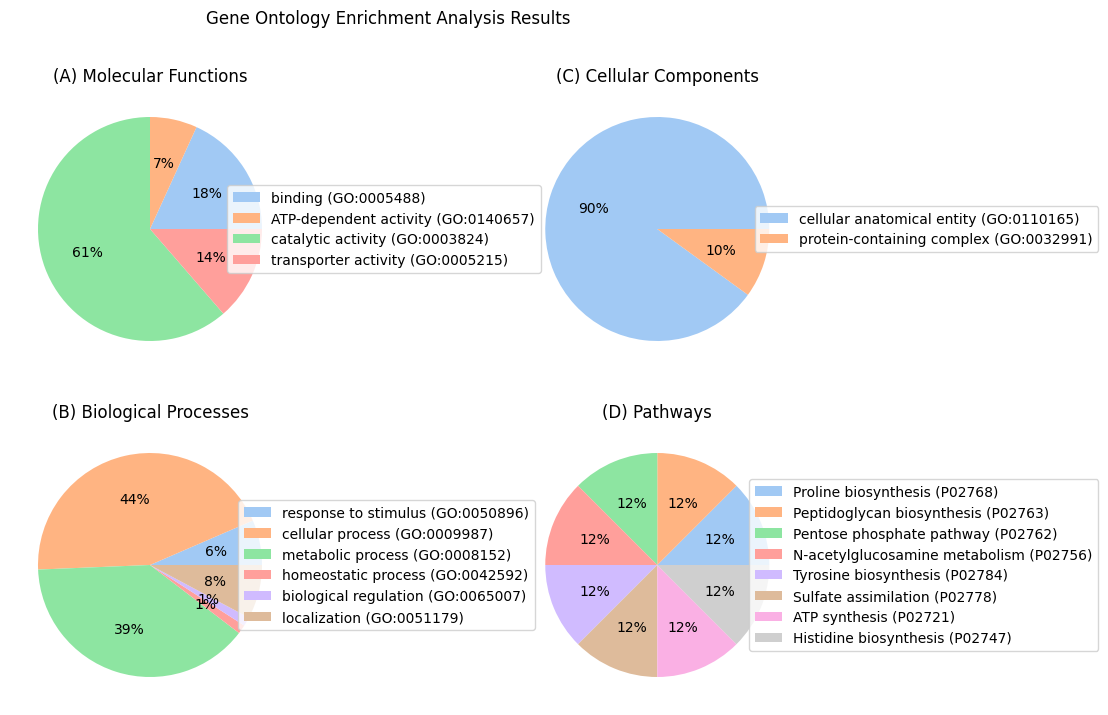

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns


# f, axes = plt.figure(figsize=(12, 8)).subplots(2, 2)
f, axes = plt.subplots(2, 2, figsize=(12, 8))


colors = sns.color_palette('pastel')

#create pie chart
axes[0, 0].pie(x=molecularDf['Count'], colors = colors, autopct='%.0f%%')
axes[0, 0].legend(labels=molecularDf['GO term'], loc='center right', bbox_to_anchor=(1.92, .5))
axes[0, 0].set_title('(A) Molecular Functions')

axes[1, 0].pie(x=biologicalDf['Count'], colors = colors, autopct='%.0f%%')
axes[1, 0].legend(labels=biologicalDf['GO term'], loc='center right', bbox_to_anchor=(1.9, .5))
axes[1, 0].set_title('(B) Biological Processes')

axes[0, 1].pie(x=cellularDf['Count'], colors = colors, autopct='%.0f%%')
axes[0, 1].legend(labels=cellularDf['GO term'], loc='center right', bbox_to_anchor=(2.1, .5))
axes[0, 1].set_title('(C) Cellular Components')

axes[1, 1].pie(x=pathwayDf['Count'], colors = colors, autopct='%.0f%%')
axes[1, 1].legend(labels=pathwayDf['GO term'], loc='center right', bbox_to_anchor=(2.1, .5))
axes[1, 1].set_title('(D) Pathways')

plt.suptitle('Gene Ontology Enrichment Analysis Results')
plt.show()